Best alpha: 0.001
Best l1_ratio: 0.1
Test Mean Squared Error: 0.0016


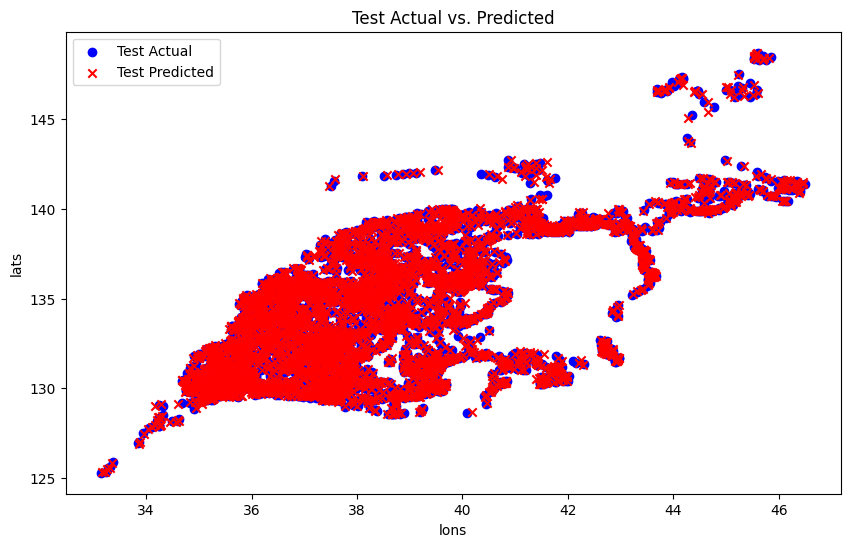

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#데이터 읽기
df = pd.read_csv('data\data_drifter.csv')

#데이터 분할
X = df[[ 'lons', 'lats', 'uo', 'vo', 'u10', 'v10']]
y = df[['next_lons', 'next_lats']]

#데이터를 훈련, 검증 및 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#ElasticNet 모델 생성
elasticnet_model = ElasticNet()

#하이퍼파라미터 그리드 정의
param_grid = {
    'alpha': [0.1, 1.0, 10.0],  # alpha 후보값
    'l1_ratio': [0.1, 0.5, 0.9]  # l1_ratio 후보값
}

#GridSearchCV를 사용하여 최적의 alpha와 l1_ratio 찾기
grid_search = GridSearchCV(estimator=elasticnet_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#최적의 하이퍼파라미터 확인
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")


# 최적의 모델 가져오기
best_elasticnet_model = grid_search.best_estimator_

# 모델 훈련
best_elasticnet_model.fit(X_train, y_train)

#예측
y_pred_test = best_elasticnet_model.predict(X_test)

#평가
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Test Mean Squared Error: {mse_test:.4f}")

#Scatter plot으로 테스트 데이터 실제 값과 예측값 표시
plt_y_test = y_test.values
plt.figure(figsize=(10, 6))
plt.scatter(plt_y_test[:, 1], plt_y_test[:, 0], label='Test Actual', c='blue', marker='o')
plt.scatter(y_pred_test[:, 1], y_pred_test[:, 0], label='Test Predicted', c='red', marker='x')
plt.xlabel('lons')
plt.ylabel('lats')
plt.title('Test Actual vs. Predicted')
plt.legend()
plt.show()

Best alpha: 0.001
Best l1_ratio: 0.1
Test Mean Squared Error: 0.0015


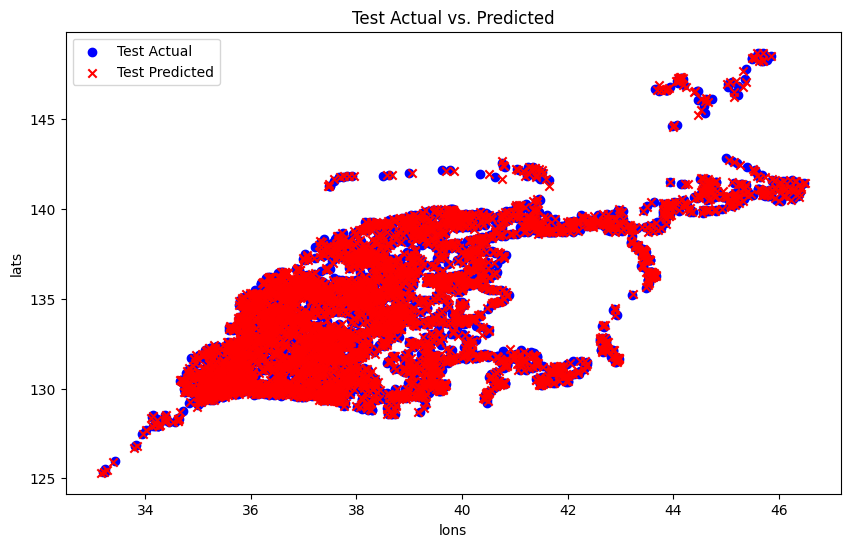

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#데이터 읽기
df = pd.read_csv('data\data_drifter.csv')

#데이터 분할
X = df[[ 'lons', 'lats', 'uo', 'vo', 'u10', 'v10']]
y = df[['next_lons', 'next_lats']]

#데이터를 훈련, 검증 및 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

#ElasticNet 모델 생성
elasticnet_model = ElasticNet()

#하이퍼파라미터 그리드 정의
param_grid = {
    'alpha': [0.1, 0.01, 0.001, 0.0001],  # alpha 후보값
    'l1_ratio': [0.1, 0.3 ,0.5, 0.7 ,0.9]  # l1_ratio 후보값
}

#GridSearchCV를 사용하여 최적의 alpha와 l1_ratio 찾기
grid_search = GridSearchCV(estimator=elasticnet_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#최적의 하이퍼파라미터 확인
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")


# 최적의 모델 가져오기
best_elasticnet_model = grid_search.best_estimator_

# 모델 훈련
best_elasticnet_model.fit(X_train, y_train)

#예측
y_pred_test = best_elasticnet_model.predict(X_test)

#평가
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Test Mean Squared Error: {mse_test:.4f}")

#Scatter plot으로 테스트 데이터 실제 값과 예측값 표시
plt_y_test = y_test.values
plt.figure(figsize=(10, 6))
plt.scatter(plt_y_test[:, 1], plt_y_test[:, 0], label='Test Actual', c='blue', marker='o')
plt.scatter(y_pred_test[:, 1], y_pred_test[:, 0], label='Test Predicted', c='red', marker='x')
plt.xlabel('lons')
plt.ylabel('lats')
plt.title('Test Actual vs. Predicted')
plt.legend()
plt.show()